# Take Home Exam Empirical Industrial Organization

Please send your solutions to afniedermayer@gmail.com by April 16. Please make sure your Jupyter Notebook has the filename take-home-exam-LASTNAME-FIRSTNAME.ipynb. Provide all answers in this notebook. You can write the answers to the theoretical questions in Markdown Cells [1] right after the questions and equations in LaTeX [2], [3]. (In case you struggle with writing the equations in LaTeX, please send hand-written scanned in notes for the theoretical results.)

Rules for the take-home exam:
- You are not allowed to work together or ask others for help.
- You can check books and course material.

The exam consists of four parts: theory, data processing, structural estimation and counterfactuals.

[1] https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html

[2] https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations

[3] https://en.wikipedia.org/wiki/LaTeX


# Theory

Consider first-price sealed-bid procurement auctions. These are similar to the standard first-price sealed-bid auctions discussed in class, with one difference: there is a buyer running the auction and multiple sellers submitting sealed bids. The seller with the lowest bid wins the auction and sells the good to the buyer. The price paid is the bid by the winning seller.

Formally, each seller has a cost $c_i$. $c_i$ is private information: each seller knows his own cost, but not that of the others. Costs $c_i$ are i.i.d. draws from a distribution $F$. $F$ is common knowledge and has support $[\underline c, \overline c]$.

Define $c_{-i}:=\min_{j\neq i} c_j$. Denote the distribution of $c_{-i}$ as $G$.

Denote the bid a seller submits as $b_i$. A seller's profit is $(b_i-c_i)\text{Prob}(b_i\leq \min_{j\neq i} b_j)$.

### Question 1
(a) Derive the first-order condition for a seller's maximization problem. Derive also the equilibrium bidding strategy $\beta(c)$ for a seller with cost $c$. You only need to consider symmetric equilibria. 

(b) How does the bidding function in a procurement auction $\beta$ differ from the bidding function in a standard auction? Please provide an intuition for how they differ.

*Answer:*



### Question 2
Consider the  Guerre-Perrigne-Vuong estimator for standard auctions from your homework assignment. Adjust it to procurement auctions. In particular, write down the equation mapping bids $b_i$ to pseudo-costs $\hat c_i$. (Pseudo-costs are the costs inferred from bids, analogous to the pseudo-valuations from standard auctions.)

*Hint*: Write down a seller's profit maximization problem in terms of $H$, the equilibrium distribution of bids. Use the first-order condition to back out pseudo-costs from bids.

*Answer:*



### Question 3
Now consider the buyer's expense minimization problem. Assume the buyer has a valuation $v$ in case the good is delivered to her. Her net utility is $v-\min_i b_i$ if she buys the good. Normalize her utility to 0 if she does not buy the good.

You are consulting the buyer how to maximize her utility by choosing a reserve price $r$. In a procurement auction, the auction is canceled in case no seller bids below $r$. Derive the first-order condition for optimal reserve $r$ of the buyer. Assume that the hazard rate $F(x)/f(x)$ is increasing and show that the second-order condition is satisfied under this assumption.

*Hint 1*: You don't have to derive the equilibrium bidding strategies of a first-price procurement auction with a reserve price. It's much simpler to use revenue equivalence and consider a second-price auction, the optimal reserve price for a first-price auction is the same as for a second-price auction. In the context of a procurement auctions, a second-price auction is the following: the seller with the lowest bid wins the auction and is paid the second lowest bid. If there is a reserve price, the lowest bidder is paid the second lowest bid or the reserve price, whichever is lower. Formally, if seller $i$ wins the auction, he receives the payment $\min\{r, \min_{i\neq j} b_j\}$.

*Hint 2*: The optimal reserve price in a second-price procurement auction is the same irrespective of the number of sellers. So it's simpler to derive the optimal reserve for one seller.

*Answer:*



## Data

Load the first-price procurement auction data provided for the exam.

In [10]:
import pandas as pd
import numpy as np

In [6]:
# download and read data
#df = pd.read_csv('C:\Users\Felhasználó\Empirical IO\procurement_auction.csv')

## alternatively, you can download the file yourself and read it locally
df = pd.read_csv('procurement_auction.csv')

df

,bid1,bid2,bid3
0,72.218111,58.290921,68.434822
1,50.608832,144.793057,144.275250
2,93.164961,74.208361,60.595576
3,97.951366,143.285171,100.395396
4,414.215884,87.562804,162.054999
...,...,...,...
4846,43.902681,136.307685,56.924085
4847,70.579638,75.430505,64.035210
4848,62.385236,69.759705,169.438744
4849,153.777927,55.495125,64.428017


### Question 4
(a) Plot histograms of the bids of all three bidders. 

(b) Compute the average expense of the buyer per auction and the total expense in all auctions.

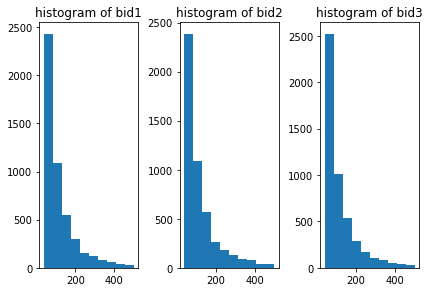

In [7]:
# (a)
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout()

plt.subplot(131)
plt.hist(df['bid1'])
plt.title('histogram of bid1')
plt.subplot(132)
plt.hist(df['bid2'])
plt.title('histogram of bid2');
plt.subplot(133)
plt.hist(df['bid3'])
plt.title('histogram of bid3');

In [8]:
# (b)
bids = df[['bid1', 'bid2', 'bid3']]
mean = bids.mean(axis=0)
mean

total = bids.sum(axis=1)
total

0       198.943854
1       339.677139
2       227.968898
3       341.631933
4       663.833686
           ...    
4846    237.134451
4847    210.045352
4848    301.583685
4849    273.701069
4850    272.280517
Length: 4851, dtype: float64

### Question 5
Compute the kernel density estimator of bids and the empirical cdf of bids. Plot the estimated densities and cdfs.

Text(0.5, 1.0, 'estimated cdf of bids')

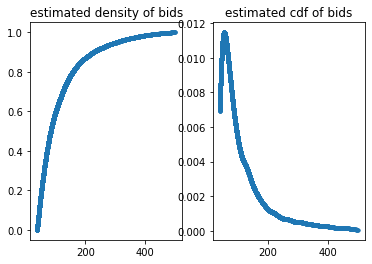

In [24]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.neighbors import KernelDensity

stacked = np.hstack((bids['bid1'], bids['bid2'], bids['bid3']))
cdf_bid1 = ECDF(stacked)(bids['bid1'])
cdf_bid2 = ECDF(stacked)(bids['bid2'])
cdf_bid3 = ECDF(stacked)(bids['bid3'])

plt.plot(stacked, np.hstack((cdf_bid1, cdf_bid2, cdf_bid3)), '.')
plt.title('estimated density')


import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.neighbors import KernelDensity

stacked = np.hstack((bids['bid1'], bids['bid2'], bids['bid3']))
cdf_bid1 = ECDF(stacked)(bids['bid1'])
cdf_bid2 = ECDF(stacked)(bids['bid2'])
cdf_bid3 = ECDF(stacked)(bids['bid3'])

def kde_sklearn(x, x_grid, bandwidth=0.2, kernel='gaussian', **kwargs):
    """Kernel Density Estimation with Scikit-learn
    valid kernels are ['gaussian'|'tophat'|'epanechnikov'|'exponential'|'linear'|'cosine']
    the default kernel is 'gaussian'"""
    kde_skl = KernelDensity(bandwidth=bandwidth, kernel=kernel, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

def scott_rule(x):
    # interquartile range
    iqr = np.percentile(x,75) - np.percentile(x,25)
    # optimal bandwidth
    h = 1.059 * min(np.std(x), iqr/1.34) * len(x)**(-0.2)
    return h

pdf_bid1 = kde_sklearn(stacked, bids['bid1'], bandwidth=scott_rule(stacked), 
                       kernel='gaussian')
pdf_bid2 = kde_sklearn(stacked, bids['bid2'], bandwidth=scott_rule(stacked), 
                       kernel='gaussian')
pdf_bid3 = kde_sklearn(stacked, bids['bid3'], bandwidth=scott_rule(stacked), 
                       kernel='gaussian')

plt.subplot(121)
plt.plot(stacked, np.hstack((cdf_bid1, cdf_bid2, cdf_bid3)), '.')
plt.title('estimated density of bids')

plt.subplot(122)
plt.plot(stacked, np.hstack((pdf_bid1, pdf_bid2, pdf_bid3)), '.')
plt.title('estimated cdf of bids')

## Structural Estimation

### Question 6
Compute the pseudo-costs for each bid using the Guerre-Perrigne-Vuong estimator adjusted for procurement auctions. Compute kernel density estimator and the empirical cdf of the pseudo-costs for all three bidders and plot them.

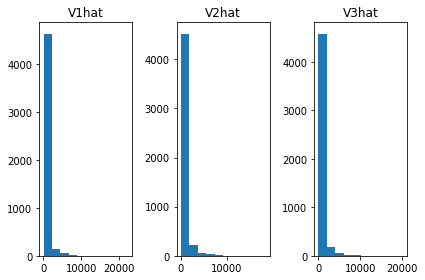

In [25]:
V1hat = bids['bid1'] + cdf_bid1 / pdf_bid1
V2hat = bids['bid2'] + cdf_bid2 / pdf_bid2
V3hat = bids['bid3'] + cdf_bid3 / pdf_bid3

plt.subplot(131)
plt.hist(V1hat)
plt.title('V1hat')
plt.subplot(132)
plt.hist(V2hat)
plt.title('V2hat')
plt.subplot(133)
plt.hist(V3hat)
plt.title('V3hat')
plt.tight_layout();

### Question 7
Plot a histogram of the relative markups $(b_i-c_i)/b_i$ of bidders.

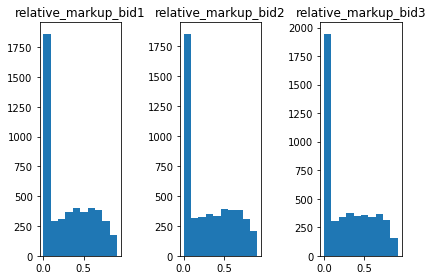

In [26]:
relative_markup_bid1 = (bids['bid1'] - bids.min(axis=1)) / bids['bid1']
relative_markup_bid2 = (bids['bid2'] - bids.min(axis=1)) / bids['bid2']
relative_markup_bid3 = (bids['bid3'] - bids.min(axis=1)) / bids['bid3']
plt.subplot(131)
plt.hist(relative_markup_bid1)
plt.title('relative_markup_bid1')
plt.subplot(132)
plt.hist(relative_markup_bid2)
plt.title('relative_markup_bid2')
plt.subplot(133)
plt.hist(relative_markup_bid3)
plt.title('relative_markup_bid3')
plt.tight_layout();


## Counterfactuals

### Question 8
What would be the winning bid in each auction if sellers were to bid their costs without a markup? Compute the average expense of the buyer per auction and the total expenses in all auction. Use the estimated pseudo-costs from the auctions in the dataset.

In [27]:
costs_bid1 = bids.min(axis=1) - relative_markup_bid1
costs_bid2 = bids.min(axis=1) - relative_markup_bid2
costs_bid3 = bids.min(axis=1) - relative_markup_bid3

totals = np.stack((costs_bid1, costs_bid2, costs_bid3)).sum(axis=0)
totals

array([174.53168693, 150.52680008, 181.25369932, ..., 186.41818219,
       165.70760539, 218.67590934])

### Question 9
What would be the bids and the price paid to the winning seller if the auction were a second-price auction? Use the realization of the pseudo-costs that you estimated to generate the counterfactual second-price auctions. 

(a) Plot a histogram of the prices paid in the counterfactual second-price auctions. Compare it with a histogram of the bid distribution in the data. 

(b) Compare the buyer's average expenses in the counterfactual second-price auction with the buyer's average expenses in the actual first-price auction.

In [ ]:
# (a)


In [ ]:
# (b)


### Question 10
Assume that the buyer's valuation is $v=100$. Compute the optimal reserve price $r^*$.

*Hint*: Recall from the theory part that the optimal reserve price is the same for a second-price auction and a first-price auction. Also recall that the optimal reserve price in a second-price auction does not depend on the number of bidders.

### Question 11
The following questions pertain to running the auction with the optimal reserve price $r^*$. Consider a counterfactual in which the pseudo-costs remain the pseudo-costs you estimated for the dataset, but the auction format changes.

(a) Compute the buyer's average utility $v-\min_{j\neq i} b_j$ (where $i$ is the winning bidder) per auction if there is no reserve price in a second-price auction. 

(b) Also compute the buyer's average utility $v-\min\{r,\min_{j\neq i} b_j\}$ in a second-price auction with the optimal reserve $r^*$. Normalize the buyer's utility to 0 if the auction is canceled.

(c) What fraction of auctions is canceled (i.e. all bids are above the reserve price) in a second-price auction with the reserve price $r^*$?

In [3]:
# (a)


In [4]:
# (b)


In [5]:
# (c)
